<h2 align="center"> Regresión logística </h2>

### Cargar la información e importar las librerías
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data = pd.read_csv("DMV_Written_Tests.csv")

In [4]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = data[["DMV_Test_1", "DMV_Test_2"]].values
results = data["Results"].values

#### Imprimimos scores y results

In [7]:
print(scores[:5])
print(results)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


### Visualización de datos
---

In [8]:
passed = (results == 1).reshape(100, 1)

In [9]:
failed = (results == 0).reshape(100, 1)

#### Realizamos una grafico de dispersión 

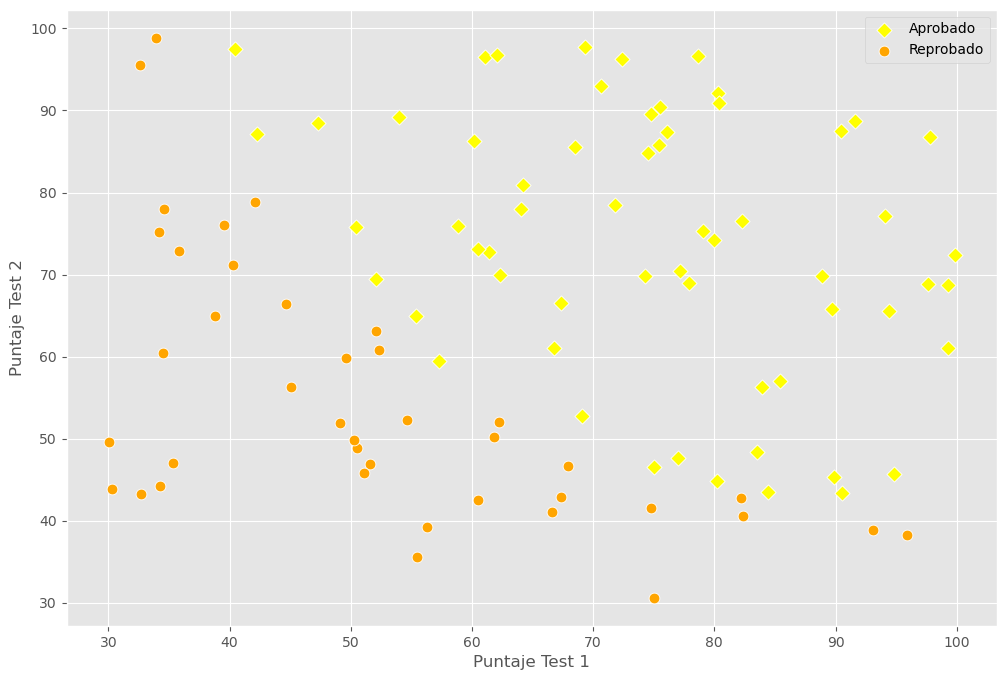

In [10]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                    y = scores[passed[:, 0], 1],
                    marker = "D",
                    color = "yellow",
                    s=60)    
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "o",
                color = "orange",
                s=60)
ax.set(xlabel="Puntaje Test 1", ylabel="Puntaje Test 2")
ax.legend(["Aprobado", "Reprobado"])
plt.show();

#### Realizamos un gráfico de dispersion cambiandos el color y marcadores con triangulos y x.

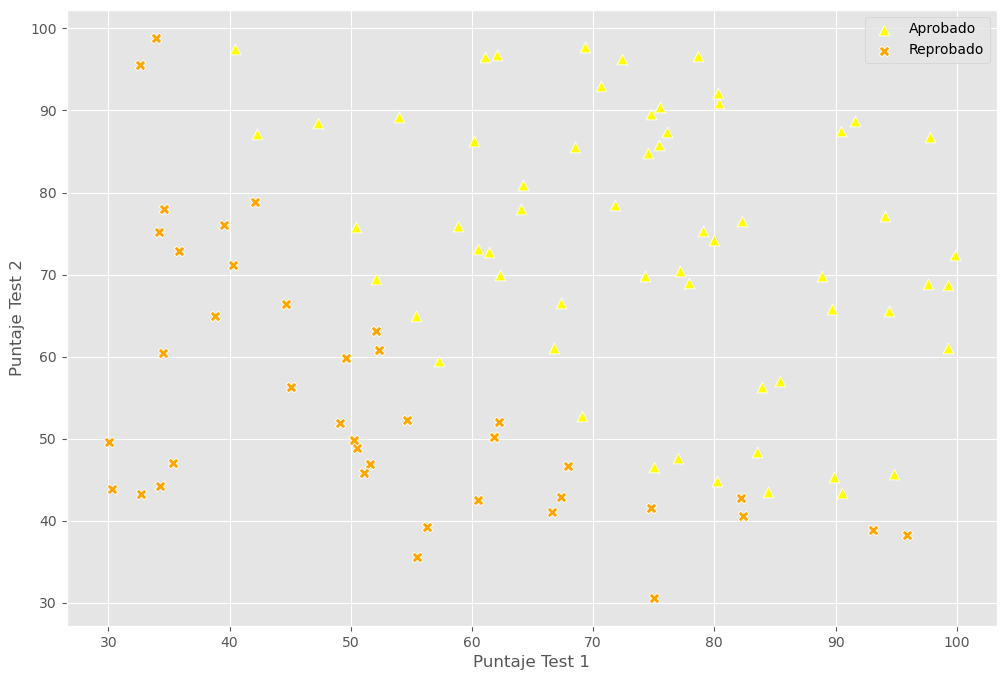

In [11]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                    y = scores[passed[:, 0], 1],
                    marker = "^",
                    color = "yellow",
                    s=60)    
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "orange",
                s=60)
ax.set(xlabel="Puntaje Test 1", ylabel="Puntaje Test 2")
ax.legend(["Aprobado", "Reprobado"])
plt.show();

### Definir la función logística de Sigmoid $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [12]:
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

In [13]:
logistic_function(0)

0.5

#### Compilamos la función logistica para valores diferentes de cero, considerando que para ello es el mayor punto de incertidumbre.

In [14]:
logistic_function(1)

0.7310585786300049

In [15]:
logistic_function(-1)

0.2689414213699951

### Calcular la función del costo $J(\theta)$ y el gradiente
---

El objetivo de la regresión logística es minimizar la función del costo

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

En donde el gradiente de la función del costo está dado por:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [16]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0], gradient

### Inicialización del costo y el gradiente
---

In [17]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

In [18]:
print("Costo inicializado", cost)
print("Gradientes inicializados", gradient)

Costo inicializado 0.693147180559946
Gradientes inicializados [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Descenso del gradiente
---

Minimizar la función del costo $J(\theta)$ actualizando la siguiente ecuación y repitiendo hasta la convergencia
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (Actualizar simultaneamente $\theta_j$ para todos los $j$)

In [19]:
def gradient_descent(x, y, theta, alpha, iter):
    costs = []
    for i in range(iter):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs
    

In [20]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [21]:
print("Theta después de ejecutar el descenso del gradiente", theta)
print("Costo resultante", costs[-1])

Theta después de ejecutar el descenso del gradiente [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Costo resultante 0.20489382035120143


### Trazando la convergencia de $J(\theta)$
---

Traza $J(\theta)$ versus el número de iteraciones de descenso de gradiente:

Text(0.5, 1.0, 'Costo vs Iteraciones')

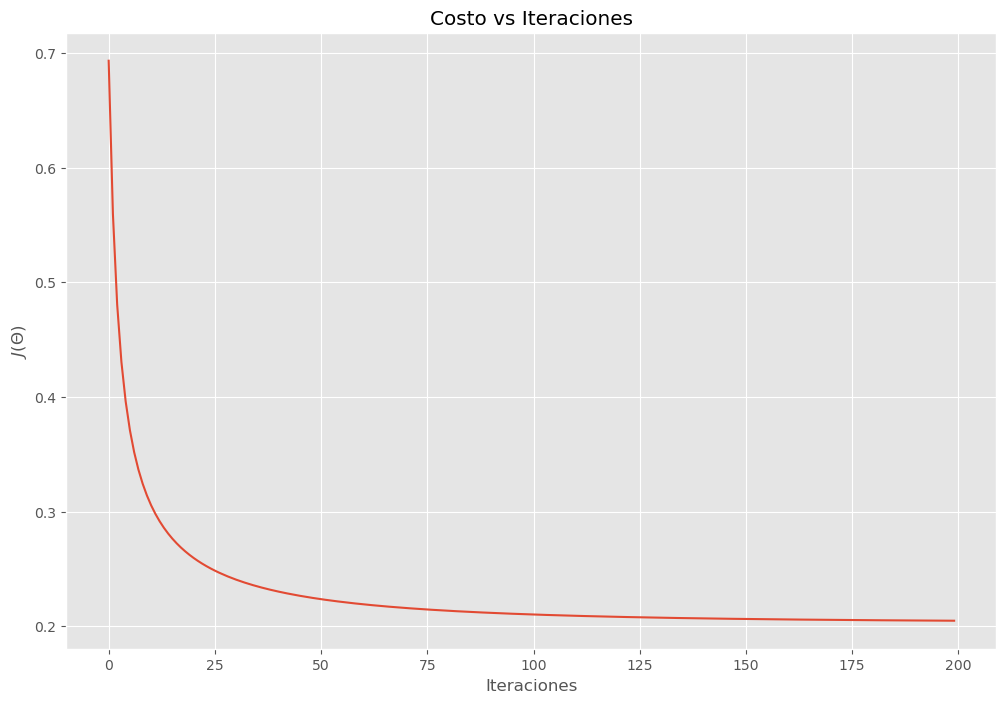

In [22]:
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Costo vs Iteraciones")

#### Un gráfico de los valores de la función vs el Número de Iteraciones.

Text(0.5, 1.0, 'Valores de la función vs Número de iteraciones')

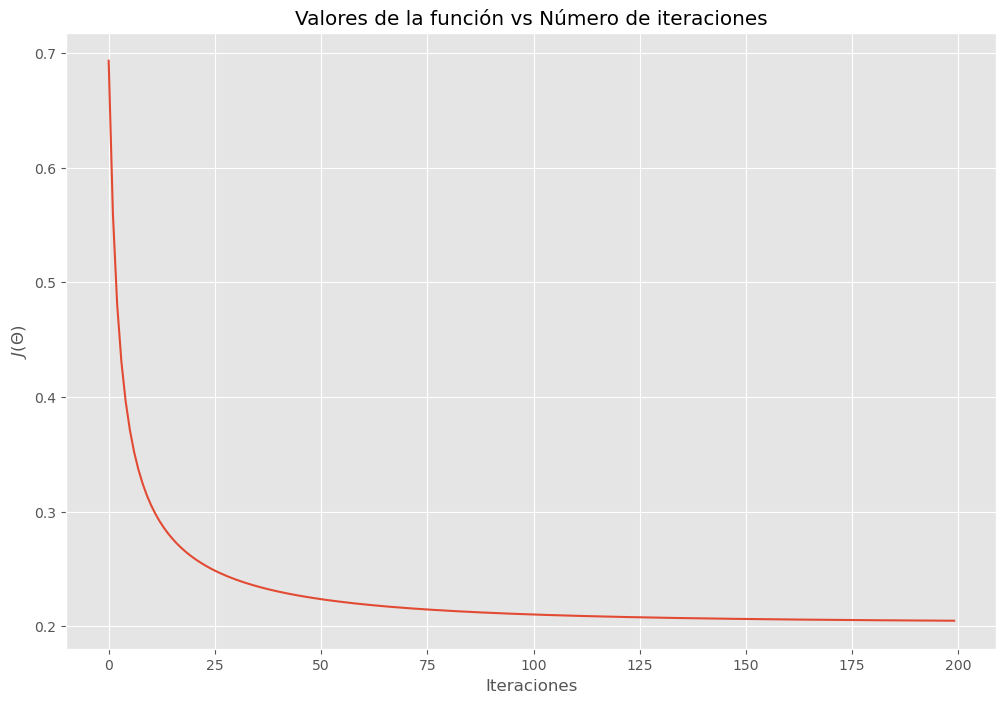

In [23]:
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valores de la función vs Número de iteraciones")

### Trazando el límite de la decisión
---

$h_\theta(x) = \sigma(z)$, en donde $\sigma$ es la función logística de Sigmoid y $z = \theta^Tx$

Cuando $h_\theta(x) \geq 0.5$ el modelo predice la clase "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predice la clase "1" 

Por lo tanto, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ es la ecuación para el límite de decisión, dándonos 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

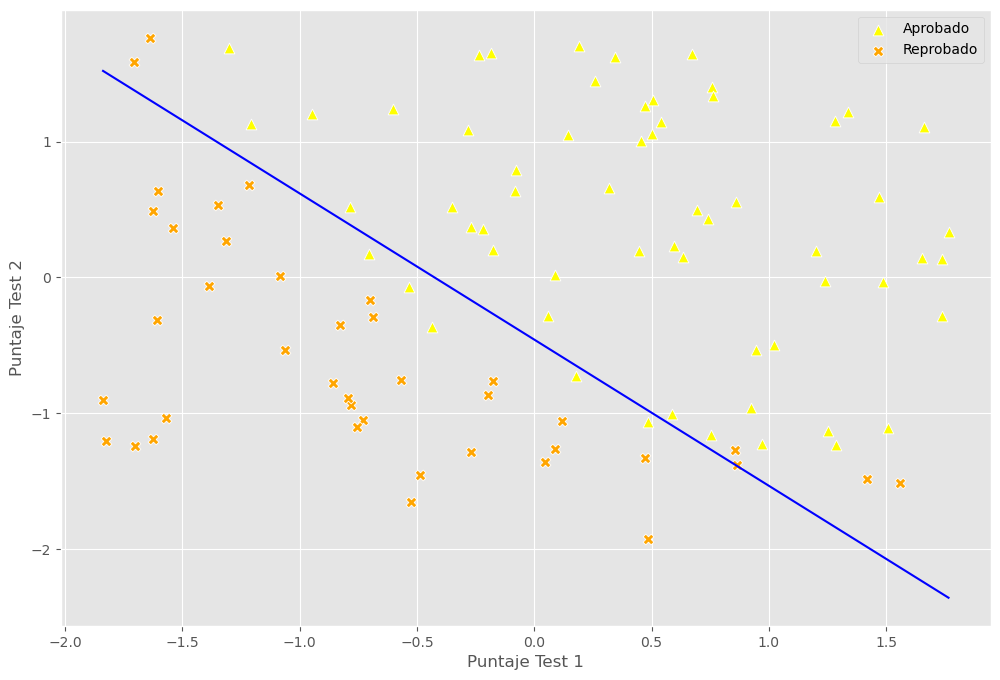

In [24]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                    y = scores[passed[:, 0], 1],
                    marker = "^",
                    color = "yellow",
                    s=60)    
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "orange",
                s=60)
ax.set(xlabel="Puntaje Test 1", ylabel="Puntaje Test 2")
ax.legend(["Aprobado", "Reprobado"])

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary =  - (theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color = "blue")
plt.show();

### Predicciones usando los valores $\theta$ optimizados
---

$h_\theta(x) = x\theta$

In [25]:
def predict(theta, x):
    results = logistic_function(np.dot(x, theta))
    return results > 0.5

In [26]:
p = predict(theta, X)
print("Precisión del entrenamiento: ", sum(p==y)[0], "%")

Precisión del entrenamiento:  89 %


In [27]:
test = np.array([50, 79])
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(np.dot(test, theta))
print("Una persona que obtiene una puntuación de 50 y 79 en su prueba escrita del DMV, tiene un", np.round(probability[0], 2)*100, "% de probabilidades de aprobar")

Una persona que obtiene una puntuación de 50 y 79 en su prueba escrita del DMV, tiene un 71.0 % de probabilidades de aprobar


In [28]:
test = np.array([45, 82])
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(np.dot(test, theta))
print("Una persona que obtiene una puntuación de 45 y 82 en su prueba escrita del DMV, tiene un", np.round(probability[0], 2)*100, "% de probabilidades de aprobar")

Una persona que obtiene una puntuación de 45 y 82 en su prueba escrita del DMV, tiene un 63.0 % de probabilidades de aprobar
